In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
#load model
model = tf.keras.models.load_model('D:/M. Tech/Companies/Projects/Automatic Number Plate Recognition/models/object_detection.h5')
print("model loaded Succesfully")

model loaded Succesfully


In [61]:
path = "D:/M. Tech/Companies/Projects/Automatic Number Plate Recognition/images/Cars1.png"
image = load_img(path)
image = np.array(image, dtype=np.uint8) #8 bit array(0,255)
image1 = load_img(path, target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 #convert into array to get normalised output

In [62]:
#size of the original image
h,w,d = image.shape
print("Height of the Image", h)
print("Width of the Image", w)

Height of the Image 248
Width of the Image 400


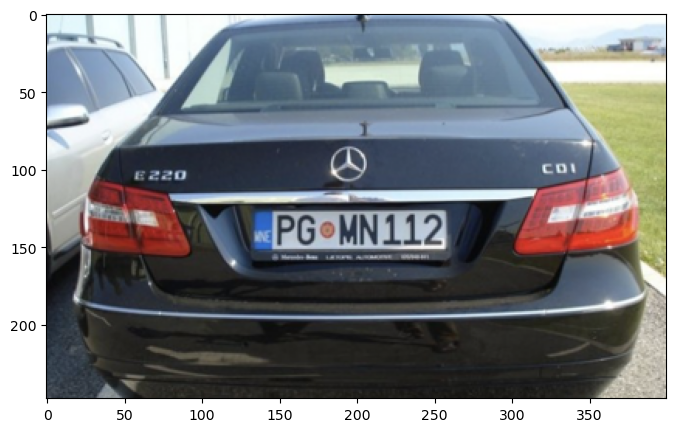

In [63]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

In [64]:
image_arr_224.shape

(224, 224, 3)

In [65]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

## Make a Prediction

In [66]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 317ms/step


array([[3.8037547e-01, 1.5465531e-09, 1.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [74]:
#denormalise output
denorm = np.array([w,h,w,h])
print(denorm)
print(coords)
coords = coords*denorm
coords

[400 248 400 248]
[[152   0 400 248]]


array([[ 60800,      0, 160000,  61504]])

In [68]:
coords = coords.astype(np.int32)
coords

array([[152,   0, 400, 248]])

(152, 400) (0, 248)


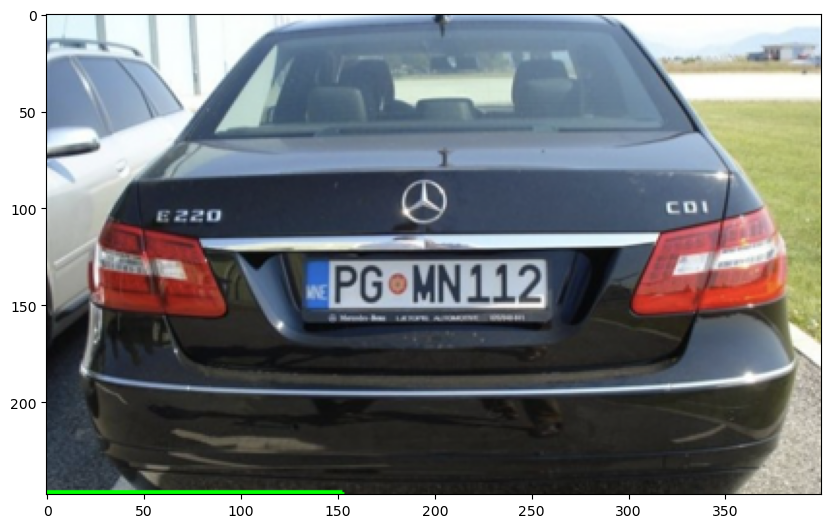

In [71]:
#Lets Bounding Box
xmin, xmax, ymin, ymax = coords[0]
pt1 =(xmin, ymin)
pt2 = (xmax, ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [85]:
#Create pipeline
#load model
def object_detection(path):
    
    image = load_img(path)#PIL object
    image = np.array(image, dtype=np.uint8) #8 bit array(0,255)
    image1 = load_img(path, target_size=(224,224))
    #data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 #convert into array to get normalised output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    #make prediction
    coords = model.predict(test_arr)
    
    #denormalise value
    denorm = np.array([w,h,w,h])
    coords = coords*denorm
    coords = coords.astype(np.int32)
    #draw the boundry on top of image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 =(xmin, ymin)
    pt2 = (xmax, ymax)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

    

1/1 [==============================] - 0s 268ms/step


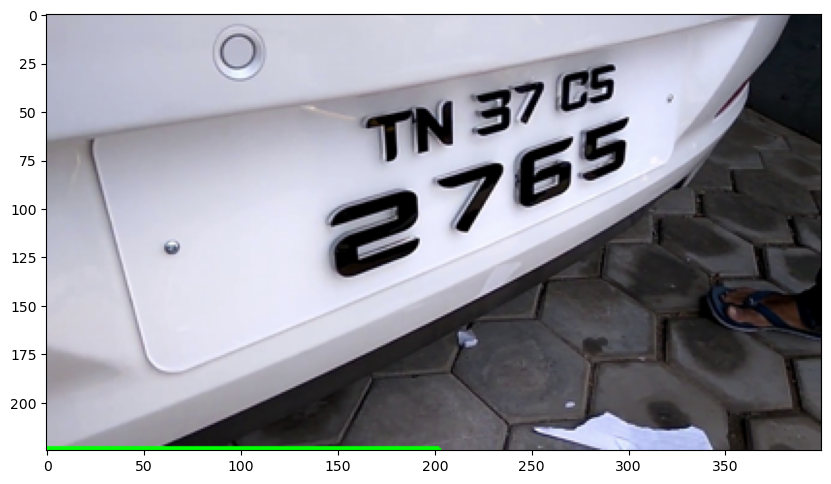

In [87]:
path = "D:/M. Tech/Companies/Projects/Automatic Number Plate Recognition/images/Cars10.png"
image, coords=  object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()